In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linking-writing-processes-to-writing-quality/sample_submission.csv
/kaggle/input/linking-writing-processes-to-writing-quality/test_logs.csv
/kaggle/input/linking-writing-processes-to-writing-quality/train_scores.csv
/kaggle/input/linking-writing-processes-to-writing-quality/train_logs.csv


# 1. Importing data from Kaggle

In [2]:
# Define paths to CSV files
TRAIN_LOGS   = "/kaggle/input/linking-writing-processes-to-writing-quality/train_logs.csv"
TRAIN_SCORES = "/kaggle/input/linking-writing-processes-to-writing-quality/train_scores.csv"
TEST_LOGS    = "/kaggle/input/linking-writing-processes-to-writing-quality/test_logs.csv"
SAMPLE_SUB   = "/kaggle/input/linking-writing-processes-to-writing-quality/sample_submission.csv"


import pandas as pd

df_train_logs = pd.read_csv(TRAIN_LOGS)
df_train_scores = pd.read_csv(TRAIN_SCORES)
df_test_logs = pd.read_csv(TEST_LOGS)
df_sample_submission = pd.read_csv(SAMPLE_SUB)

print("Train logs:", TRAIN_LOGS)
print("Train scores:", TRAIN_SCORES)
print("Test logs:", TEST_LOGS)
print("Sample submission:", SAMPLE_SUB)

Train logs: /kaggle/input/linking-writing-processes-to-writing-quality/train_logs.csv
Train scores: /kaggle/input/linking-writing-processes-to-writing-quality/train_scores.csv
Test logs: /kaggle/input/linking-writing-processes-to-writing-quality/test_logs.csv
Sample submission: /kaggle/input/linking-writing-processes-to-writing-quality/sample_submission.csv


# 2. Exploratory Data Analysis

## 2.1 Understanding the raw data

In [3]:
import pandas as pd

# Create dataframes of the given data
df_train_logs = pd.read_csv(TRAIN_LOGS)
df_train_scores = pd.read_csv(TRAIN_SCORES)
df_test_logs = pd.read_csv(TEST_LOGS)
df_sample_submission = pd.read_csv(SAMPLE_SUB)

In [4]:
# Understand the shape of the data
print("Train logs shape:", df_train_logs.shape)
print("Train scores shape:", df_train_scores.shape)
print("Test logs shape:", df_test_logs.shape)
print("Sample submission shape:", df_sample_submission.shape)

# View some entries of the data
display(df_train_logs.head())
display(df_train_scores.head())
display(df_test_logs.head())

# Get data types of each column
print(df_train_logs.dtypes)

Train logs shape: (8405898, 11)
Train scores shape: (2471, 2)
Test logs shape: (6, 11)
Sample submission shape: (3, 2)


,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1


,id,score
0,001519c8,3.5
1,0022f953,3.5
2,0042269b,6.0
3,0059420b,2.0
4,0075873a,4.0


,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,0000aaaa,1,338433,338518,85,Input,Space,Space,,0,0
1,0000aaaa,2,760073,760160,87,Input,Space,Space,,1,0
2,2222bbbb,1,711956,712023,67,Input,q,q,q,0,1
3,2222bbbb,2,290502,290548,46,Input,q,q,q,1,1
4,4444cccc,1,635547,635641,94,Input,Space,Space,,0,0


id                 object
event_id            int64
down_time           int64
up_time             int64
action_time         int64
activity           object
down_event         object
up_event           object
text_change        object
cursor_position     int64
word_count          int64
dtype: object


## 2.2 Analysing the train_logs data

In [5]:
# Check activity column
print("---- activity ----")
print("Types:", set(df_train_logs["activity"].map(type)))
print("Sample values:", df_train_logs["activity"].dropna().unique()[:20])

# Check down_event column
print("\n---- down_event ----")
print("Types:", set(df_train_logs["down_event"].map(type)))
print("Sample values:", df_train_logs["down_event"].dropna().unique()[:20])

# Check up_event column
print("\n---- up_event ----")
print("Types:", set(df_train_logs["up_event"].map(type)))
print("Sample values:", df_train_logs["up_event"].dropna().unique()[:20])

# Check text_change column (we realise that there is an entry type that only consists of a space, and the qqqs)
print("\n---- text_change ----")
print("Types:", set(df_train_logs["text_change"].map(type)))
print("Sample values:", df_train_logs["text_change"].dropna().unique()[:20])




---- activity ----
Types: {<class 'str'>}
Sample values: ['Nonproduction' 'Input' 'Remove/Cut' 'Replace'
 'Move From [284, 292] To [282, 290]' 'Move From [287, 289] To [285, 287]'
 'Move From [460, 461] To [465, 466]' 'Paste'
 'Move From [905, 1314] To [907, 1316]'
 'Move From [565, 743] To [669, 847]' 'Move From [669, 847] To [565, 743]'
 'Move From [1041, 1121] To [1496, 1576]'
 'Move From [1455, 1557] To [1323, 1425]'
 'Move From [2268, 2275] To [2247, 2254]'
 'Move From [213, 302] To [902, 991]' 'Move From [0, 158] To [234, 392]'
 'Move From [460, 465] To [925, 930]' 'Move From [810, 906] To [816, 912]'
 'Move From [186, 187] To [184, 185]' 'Move From [140, 272] To [299, 431]']

---- down_event ----
Types: {<class 'str'>}
Sample values: ['Leftclick' 'Shift' 'q' 'Space' 'Backspace' '.' ',' 'Enter' 'ArrowLeft'
 "'" ';' 'ArrowRight' '-' '?' 'Tab' '"' 'ArrowUp' 'ArrowDown' 'Rightclick'
 '=']

---- up_event ----
Types: {<class 'str'>}
Sample values: ['Leftclick' 'Shift' 'q' 'Space' 'Bac

In [6]:
# Check number of NAs in each column
print(df_train_logs.isna().sum())

id                 0
event_id           0
down_time          0
up_time            0
action_time        0
activity           0
down_event         0
up_event           0
text_change        0
cursor_position    0
word_count         0
dtype: int64


## 2.3 Define a data cleaning function

In [7]:
import pandas as pd
import numpy as np

def clean_logs(df):

    df = df.copy()

    # 1. Cast numeric columns to integers

    numeric_cols = ["event_id", "down_time", "up_time", "action_time",
                    "cursor_position", "word_count"]

    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0).astype(int)

    # word_count should not be negative
    df["word_count"] = df["word_count"].clip(lower=0)

    # 2. Clean + transform text_change

    df["text_change_numerical"] = (
        df["text_change"]
        .replace(" ", "[space]")                     # Replace literal spaces with "[space]"
        .replace(r"^\s*$", "NoChange", regex=True)   # Replace whitespace-only strings with "NoChange"
        .fillna("NoChange")                          # Replace NaNs with "NoChange"
    )

    # For all alphanumeric changes, we will now look at them in the perspective of change in number of characters)
    def parse_text_change(val):
        if "q" not in val:
            return val
        elif "=>" in val:
            before, after = val.split("=>", 1)
            delta = len(after.strip()) - len(before.strip())
            if delta > 0:
                return f"q_add_{delta}"
            elif delta < 0:
                return f"q_subtract_{abs(delta)}"
            else:
                return "q_0"
        else:
            delta = len(val.strip())
            return f"q_add_{delta}" if delta > 0 else "q_0"

    df["text_change_numerical"] = df["text_change"].apply(parse_text_change) #add new column instead of changing the original column

    return df

## 2.4 Define a data aggregation function

In [8]:
# Define an aggregation function to reflect the events that happen per essay

import pandas as pd
import numpy as np
import re

def aggregate_logs(df):

    # Ensure sorted
    df = df.sort_values(by=["id", "event_id"]).reset_index(drop=True)
    g = df.groupby("id", sort=False)

    # 1. event_id → total events
    out = pd.DataFrame()
    out["total_events"] = g["event_id"].count()

    # 2. down_time and up_time
    out["writing_start"] = g["down_time"].min()
    out["writing_end"]   = g["up_time"].max()
    out["writing_duration"] = out["writing_end"] - out["writing_start"]

    # 3. action_time
    out["mean_action_time"]   = g["action_time"].mean()
    out["median_action_time"] = g["action_time"].median()
    out["std_action_time"]    = g["action_time"].std().fillna(0)
    out["max_action_time"]    = g["action_time"].max()
    out["min_action_time"]    = g["action_time"].min()
    out["sum_action_time"]    = g["action_time"].sum()

    # 4. activity
    act_str = df["activity"].astype(str).str.strip()

    # Regex for cursor move rows like 'Move From [284, 292] To [282, 290]'
    move_pat = r'^Move From \[\s*(-?\d+)\s*,\s*(-?\d+)\s*\]\s*To\s*\[\s*(-?\d+)\s*,\s*(-?\d+)\s*\]$'
    is_move = act_str.str.match(move_pat, case=False, na=False)

    # (A) Non-move activity counts
    if (~is_move).any():
        non_move_counts = (
            pd.crosstab(df.loc[~is_move, "id"], df.loc[~is_move, "activity"])
            .add_prefix("num_")
        )
        out = out.join(non_move_counts, how="left").fillna(0)

    # (B) Cursor move distances
    coords = act_str.str.extract(move_pat).astype(float)  # x1, y1, x2, y2 (NaN if not a move)
    dx = coords[2] - coords[0]
    dy = coords[3] - coords[1]
    move_dist = np.sqrt(dx**2 + dy**2)
    df["_move_dist"] = move_dist.where(is_move, np.nan)

    out["cursor_move_dist_mean"]   = g["_move_dist"].mean().fillna(0)
    out["cursor_move_dist_std"]    = g["_move_dist"].std().fillna(0)
    out["cursor_move_dist_total"]  = g["_move_dist"].sum().fillna(0)
    out["cursor_move_count"]       = g["_move_dist"].count().fillna(0)

    # 5. text_change (numeric summaries instead of one-hot)

    # Total number of text_change events per essay
    out["tc_total"] = g["text_change"].count()

    # Total number of text_change events involving 'q' (adds/subtracts)
    out["tc_q_total"] = g["text_change"].apply(lambda s: s.str.startswith("q").sum())

    # Net overall character change from q_add / q_subtract
    def compute_q_overall(series):
        total = 0
        for val in series:
            if isinstance(val, str):
                if val.startswith("q_add_"):
                    # e.g. q_add_3 -> +3
                    try:
                        total += int(val.split("_")[-1])
                    except ValueError:
                        pass
                elif val.startswith("q_subtract_"):
                    # e.g. q_subtract_2 -> -2
                    try:
                        total -= int(val.split("_")[-1])
                    except ValueError:
                        pass
        return total

    out["tc_q_overall_delta"] = g["text_change"].apply(compute_q_overall)

    # 6. cursor_position
    out["mean_cursor"] = g["cursor_position"].mean()
    out["std_cursor"]  = g["cursor_position"].std().fillna(0)
    out["max_cursor"]  = g["cursor_position"].max()

    # 7. word_count
    wc_first = g["word_count"].first()
    wc_last  = g["word_count"].last()
    out["final_word_count"] = wc_last
    out["max_word_count"]   = g["word_count"].max()
    out["min_word_count"]   = g["word_count"].min()
    out["std_word_count"]   = g["word_count"].std().fillna(0)
    out["word_growth_rate"] = (wc_last - wc_first) / out["writing_duration"].clip(lower=1) # (max word count - min word count) / duration

    # 8. Derived ratios & behavioral features

    # Typing speed: final word count per second (Helps to see fluency and pace of writing)
    out["typing_speed"] = out["final_word_count"] / out["writing_duration"].clip(lower=1)

   # --- Safe revision ratio ---
    def safe_sum(prefix):
        """Return sum of all columns starting with prefix, or 0 if none exist."""
        cols = [c for c in out.columns if c.startswith(prefix)]
        return out[cols].sum(axis=1) if cols else 0

    remove_val  = safe_sum("num_Remove")
    cut_val     = safe_sum("num_Cut")
    replace_val = safe_sum("num_Replace")
    input_val   = safe_sum("num_Input")

    out["revision_ratio"] = (remove_val + cut_val + replace_val) / (input_val + 1)

    # Pause frequency: fraction of events with action_time > 2s
    pause_threshold = 3.0
    pauses = g["action_time"].apply(lambda s: (s > pause_threshold).sum())
    out["pause_frequency"] = pauses / out["total_events"].clip(lower=1)

    return out.reset_index()

## 2.5 Apply cleaning, aggregating and appending the essay scores

In [9]:
# 1. Clean the raw logs
df_train_logs_clean = clean_logs(df_train_logs)
df_test_logs_clean  = clean_logs(df_test_logs)

# 2. Aggregate into essay-level features
df_train_logs_agg = aggregate_logs(df_train_logs_clean)
df_test_logs_agg  = aggregate_logs(df_test_logs_clean)

# 3. Align test features to have the same columns as train
df_test_logs_agg = df_test_logs_agg.reindex(columns=df_train_logs_agg.columns, fill_value=0)

# 4. Append the train_scores to the aggregated data
df_train_with_scores = df_train_logs_agg.merge(df_train_scores, on="id")

# 5. Check outputs
print("Train features shape:", df_train_with_scores.shape)
print("Test features shape:", df_test_logs_agg.shape)
print(df_train_with_scores.head())
print(df_test_logs_agg)


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Train features shape: (2471, 35)
Test features shape: (3, 34)
         id  total_events  writing_start  writing_end  writing_duration  \
0  001519c8          2557           4526      1801969           1797443   
1  0022f953          2454          30623      1788969           1758346   
2  0042269b          4136           4441      1771669           1767228   
3  0059420b          1556          41395      1404469           1363074   
4  0075873a          2531          78470      1662472           1584002   

   mean_action_time  median_action_time  std_action_time  max_action_time  \
0        116.246774               112.0        91.797374             2259   
1        112.221271               115.0        55.431189             1758   
2        101.837766                94.0        82.383766             3005   
3        121.848329               110.0       113.768226              806   
4        123.943896               129.0        62.082013              701   

   min_action_time  ... 

## 2.6 Apply baseline level investigation on relationships between selected measures and scores

In [10]:
# List all columns

for col in df_train_with_scores.columns:
    print(col)

id
total_events
writing_start
writing_end
writing_duration
mean_action_time
median_action_time
std_action_time
max_action_time
min_action_time
sum_action_time
num_Input
num_Nonproduction
num_Paste
num_Remove/Cut
num_Replace
cursor_move_dist_mean
cursor_move_dist_std
cursor_move_dist_total
cursor_move_count
tc_total
tc_q_total
tc_q_overall_delta
mean_cursor
std_cursor
max_cursor
final_word_count
max_word_count
min_word_count
std_word_count
word_growth_rate
typing_speed
revision_ratio
pause_frequency
score


In [11]:
# Final sanity checks

print(df_train_with_scores.isna().sum())        # check missing values

id                        0
total_events              0
writing_start             0
writing_end               0
writing_duration          0
mean_action_time          0
median_action_time        0
std_action_time           0
max_action_time           0
min_action_time           0
sum_action_time           0
num_Input                 0
num_Nonproduction         0
num_Paste                 0
num_Remove/Cut            0
num_Replace               0
cursor_move_dist_mean     0
cursor_move_dist_std      0
cursor_move_dist_total    0
cursor_move_count         0
tc_total                  0
tc_q_total                0
tc_q_overall_delta        0
mean_cursor               0
std_cursor                0
max_cursor                0
final_word_count          0
max_word_count            0
min_word_count            0
std_word_count            0
word_growth_rate          0
typing_speed              0
revision_ratio            0
pause_frequency           0
score                     0
dtype: int64


[3.5 6.  2.  4.  4.5 2.5 5.  3.  1.5 5.5 1.  0.5]


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


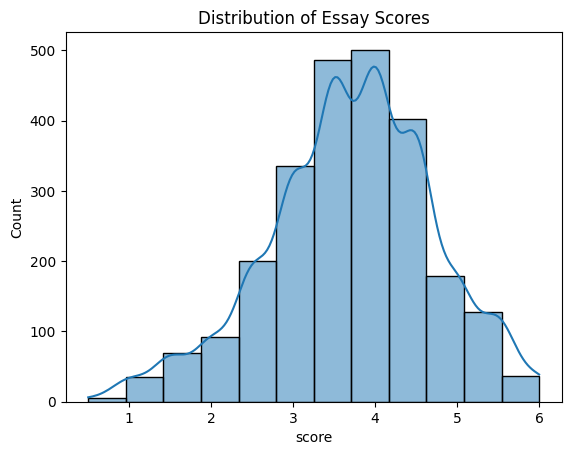

In [12]:
# Understand distribution of scores

import seaborn as sns
import matplotlib.pyplot as plt

print(df_train_with_scores['score'].unique()) #adjusted bins to 12 due to having only 12 unique scores so makes the representation clearer and the trend more obvious
sns.histplot(df_train_with_scores["score"], bins=12, kde=True)
plt.title("Distribution of Essay Scores")
plt.show()

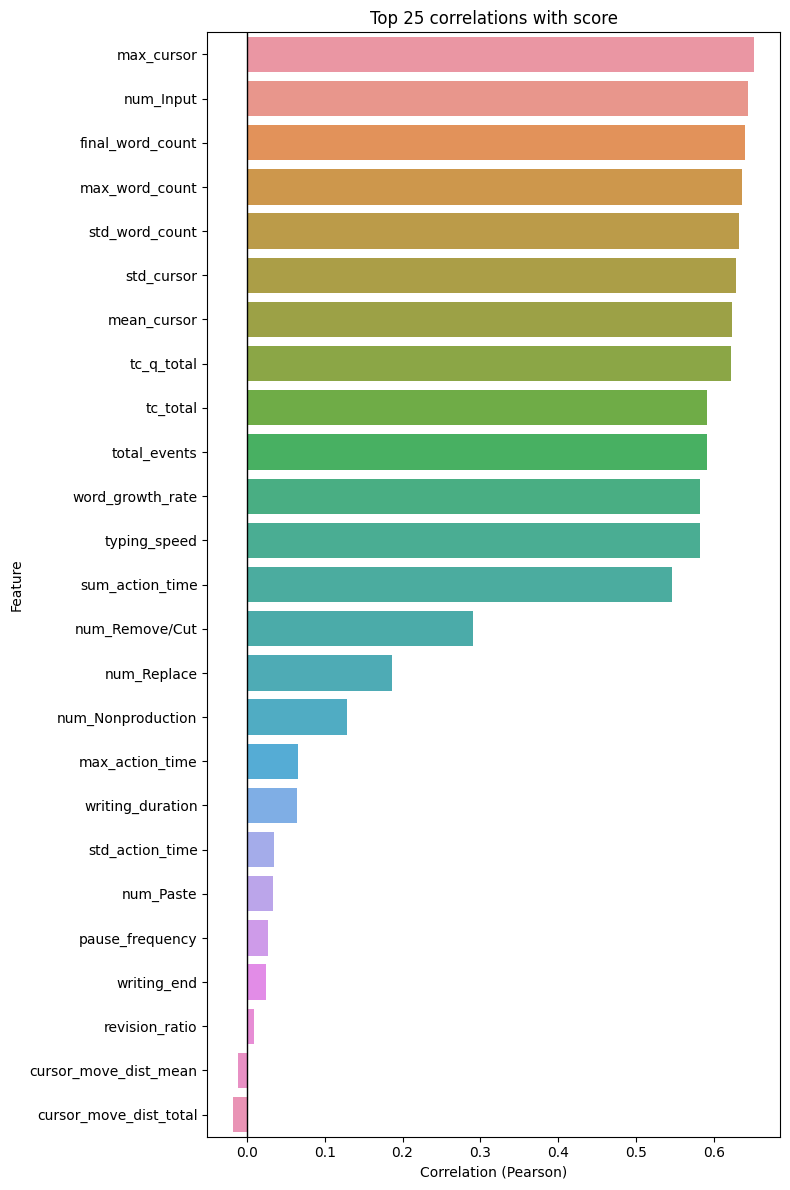

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Compute correlations only on numeric columns
corr_series = (
    df_train_with_scores
      .drop(columns=['id'])                 # id isn’t a feature
      .corr(numeric_only=True)['score']     # get correlations w.r.t. score
      .drop('score', errors='ignore')       # remove self-correlation
      .dropna()                             # drop NaNs to avoid warnings
      .sort_values(ascending=False)
)

# 2) Put into a tidy DataFrame for seaborn
corr_df = corr_series.reset_index()
corr_df.columns = ['feature', 'corr']

# (Optional) take top-N features to keep the plot readable
topN = 25
corr_df = corr_df.head(topN)

# 3) Plot cleanly
plt.figure(figsize=(8, 0.4*len(corr_df)+2))
sns.barplot(data=corr_df, x='corr', y='feature', orient='h')
plt.axvline(0, color='k', linewidth=1)
plt.title(f'Top {len(corr_df)} correlations with score')
plt.xlabel('Correlation (Pearson)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


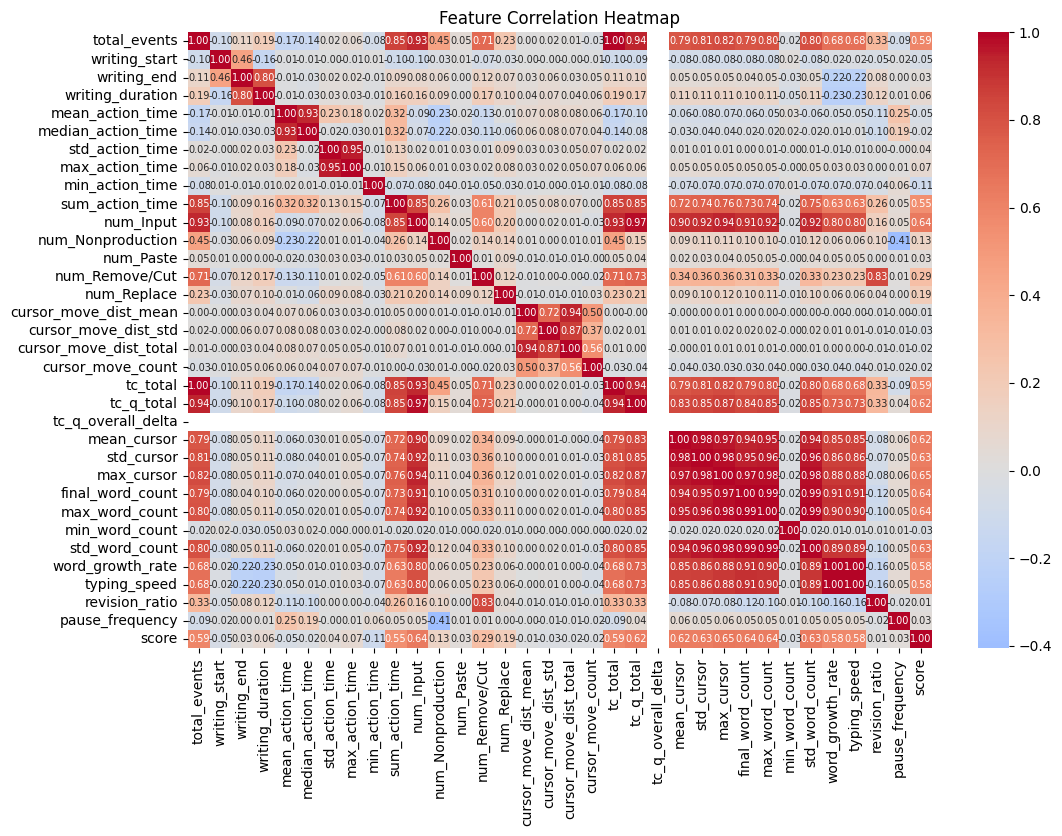

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(
    df_train_with_scores.corr(numeric_only=True),
    cmap="coolwarm",
    center=0,
    annot=True,       # show nuvalues
    fmt=".2f",        # round to 2 decimals
    annot_kws={"size":7}  # smaller font size
)
plt.title("Feature Correlation Heatmap")
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


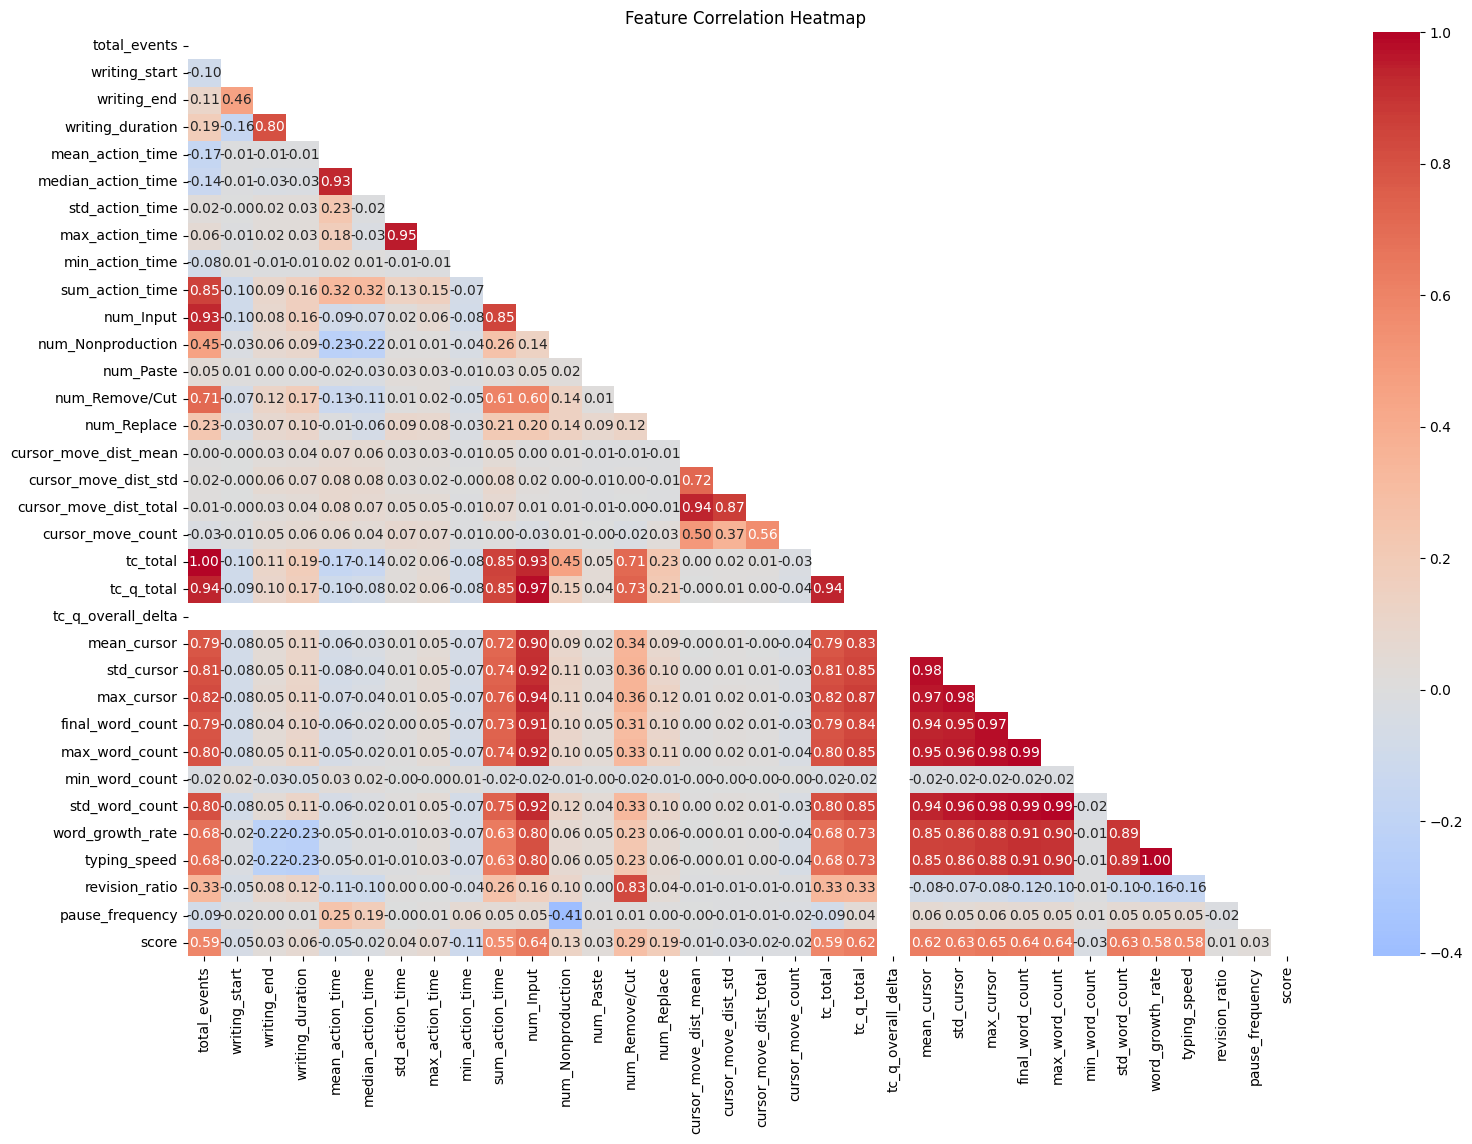

In [15]:
plt.figure(figsize=(18,12))
corr_matrix = df_train_with_scores.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap="coolwarm",
    center=0,
    annot=True, #show numerical values
    fmt=".2f" #round to 2decimal places
)
plt.title("Feature Correlation Heatmap")
plt.show()

#cant decide which map looks easier to read so i have left both of them (maybe next meeting can discuss or something)

In [16]:
''' Things to do

Cleaning/Aggregating
1. Sentence restructuring, sentence length, duration of typing each sentence, number of words between each comma
2. Coming up with creative metrics that may be highly correlated with the score
3. See if there are other tools to help us find the correlation between our columns and the score
4. Research on metrics that may be helpful (if can, put link in the document and description)
5. Discarded all inputs in first 10 mins (what the best model did)

Model Training
1. Apply models we learn in sch (decision tree, linear regression, naive-bayes, random forest, kNN)
2. Understand how the LightGBM/XGBoost/CatBoost works?


kobe is washed NAH

'''


' Things to do\n\nCleaning/Aggregating\n1. Sentence restructuring, sentence length, duration of typing each sentence, number of words between each comma\n2. Coming up with creative metrics that may be highly correlated with the score\n3. See if there are other tools to help us find the correlation between our columns and the score\n4. Research on metrics that may be helpful (if can, put link in the document and description)\n5. Discarded all inputs in first 10 mins (what the best model did)\n\nModel Training\n1. Apply models we learn in sch (decision tree, linear regression, naive-bayes, random forest, kNN)\n2. Understand how the LightGBM/XGBoost/CatBoost works?\n\n\nkobe is washed NAH\n\n'

In [17]:
df_train_logs_clean[df_train_logs_clean['down_event'] == 'Shift']

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count,text_change_numerical
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0,NoChange
169,001519c8,170,191743,191743,0,Nonproduction,Shift,Shift,NoChange,106,18,NoChange
184,001519c8,185,204937,204937,0,Nonproduction,Shift,Shift,NoChange,106,18,NoChange
247,001519c8,248,263203,263203,0,Nonproduction,Shift,Shift,NoChange,110,19,NoChange
248,001519c8,249,263378,263378,0,Nonproduction,Shift,Shift,NoChange,110,19,NoChange
...,...,...,...,...,...,...,...,...,...,...,...,...
8405378,fff05981,3100,1799265,1799265,0,Nonproduction,Shift,Shift,NoChange,1100,183,NoChange
8405379,fff05981,3101,1799297,1799297,0,Nonproduction,Shift,Shift,NoChange,1100,183,NoChange
8405530,fff05981,3252,1835981,1835981,0,Nonproduction,Shift,Shift,NoChange,1247,199,NoChange
8405891,fff05981,3613,2062125,2062125,0,Nonproduction,Shift,Shift,NoChange,1268,240,NoChange


## 2.7 Reconstructing essay




In [18]:
def getEssays(df):
    # Copy required columns
    textInputDf = df_train_logs_clean[['id', 'activity', 'cursor_position', 'text_change']].copy()

    # Get rid of text inputs that dont add or remove any text
    # Note: Shift was unpredictable so we ignored it, due to similar up and downtimes
    textInputDf = textInputDf[textInputDf.activity != 'Nonproduction']

    # Get how much each Id there is, aka how many rows of text input we have to go through, and ranks them in the order in which we see them in the original dataframe
    valCountsArr = textInputDf['id'].value_counts(sort=False).values

    # Holds the final index of the previous Id, basically demarcates where one essay ends and another essay starts
    lastIndex = 0

    # Holds all the essays that have been reconstructed
    essaySeries = pd.Series()

    # Fills essay series with essays, #enumerate function acts as the counter for each essay to iterate through the rows
    for index, valCount in enumerate(valCountsArr):

        # Indexes down_time at current Id, indexes through the rows of the current essay
        currTextInput = textInputDf[['activity', 'cursor_position', 'text_change']].iloc[lastIndex : lastIndex + valCount]

        # Update the last index to jump to the next essay
        lastIndex += valCount

        # Where the essay content will be stored
        essayText = ""


        # Produces the essay by iterating through the input rows in the current essay
        for Input in currTextInput.values:

            # Input[0] = activity
            # Input[1] = cursor_position
            # Input[2] = text_change

            # If activity = Replace
            if Input[0] == 'Replace':
                # splits text_change at ' => '
                replaceTxt = Input[2].split(' => ')

                # DONT TOUCH
                essayText = essayText[:Input[1] - len(replaceTxt[1])] + replaceTxt[1] + essayText[Input[1] - len(replaceTxt[1]) + len(replaceTxt[0]):]
                continue


            # If activity = Paste
            if Input[0] == 'Paste':
                # DONT TOUCH
                essayText = essayText[:Input[1] - len(Input[2])] + Input[2] + essayText[Input[1] - len(Input[2]):]
                continue


            # If activity = Remove/Cut
            if Input[0] == 'Remove/Cut':
                # DONT TOUCH
                essayText = essayText[:Input[1]] + essayText[Input[1] + len(Input[2]):]
                continue


            # If activity = Move...
            if "M" in Input[0]:
                # Gets rid of the "Move from to" text
                croppedTxt = Input[0][10:]

                # Splits cropped text by ' To '
                splitTxt = croppedTxt.split(' To ')

                # Splits split text again by ', ' for each item
                valueArr = [item.split(', ') for item in splitTxt]

                # Move from [2, 4] To [5, 7] = (2, 4, 5, 7)
                moveData = (int(valueArr[0][0][1:]), int(valueArr[0][1][:-1]), int(valueArr[1][0][1:]), int(valueArr[1][1][:-1]))

                # Skip if someone manages to activiate this by moving to same place
                if moveData[0] != moveData[2]:
                    # Check if they move text forward in essay (they are different)
                    if moveData[0] < moveData[2]:
                        # DONT TOUCH
                        essayText = essayText[:moveData[0]] + essayText[moveData[1]:moveData[3]] + essayText[moveData[0]:moveData[1]] + essayText[moveData[3]:]
                    else:
                        # DONT TOUCH
                        essayText = essayText[:moveData[2]] + essayText[moveData[0]:moveData[1]] + essayText[moveData[2]:moveData[0]] + essayText[moveData[1]:]
                continue


            # If just input
            # Formula is basically the cursor position - the
            essayText = essayText[:Input[1] - len(Input[2])] + Input[2] + essayText[Input[1] - len(Input[2]):]
            #adds the original text from start until the cursor position - length of new word text +  inserts the new text + the cursor after the input to the end

        # Sets essay at index
        essaySeries[index] = essayText


    # Sets essay series index to the ids
    essaySeries.index =  textInputDf['id'].unique()


    # Returns the essay series
    return essaySeries

In [19]:
#essays = getEssays(df_train_logs_clean)


In [20]:
#print(essays.loc['001519c8'])


In [21]:
# Just seeing data
print(df_train_with_scores)

            id  total_events  writing_start  writing_end  writing_duration  \
0     001519c8          2557           4526      1801969           1797443   
1     0022f953          2454          30623      1788969           1758346   
2     0042269b          4136           4441      1771669           1767228   
3     0059420b          1556          41395      1404469           1363074   
4     0075873a          2531          78470      1662472           1584002   
...        ...           ...            ...          ...               ...   
2466  ffb8c745          4739          22467      1791649           1769182   
2467  ffbef7e5          2604          21732      1799174           1777442   
2468  ffccd6fd          3063          23482      1959363           1935881   
2469  ffec5b38          3242          19885      1508504           1488619   
2470  fff05981          3619          39727      2070133           2030406   

      mean_action_time  median_action_time  std_action_time  ma

## 2.8 Split into Kfolds for cross validation



In [22]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import inspect

# Robust RMSE helper (handles old/new sklearn)
def rmse_score(y_true, y_pred):
    if 'squared' in inspect.signature(mean_squared_error).parameters:
        return mean_squared_error(y_true, y_pred, squared=False)
    else:
        return np.sqrt(mean_squared_error(y_true, y_pred))

# --- Prepare data ---
# List of top correlated columns from your chart
top_features = [
    'max_cursor', 'num_Input', 'final_word_count', 'max_word_count', 'std_word_count',
    'std_cursor', 'mean_cursor', 'tc_q_total', 'total_events', 'tc_total',
    'word_growth_rate', 'typing_speed', 'sum_action_time'
    # add the remaining ones up to 25 if you have them
]

# Keep only these features + 'score' (if needed)
X = df_train_with_scores[top_features]

y = df_train_with_scores['score']

# Initialize cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []
models = []

In [23]:
for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    print(f"\n🧩 Fold {fold}")
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = LGBMRegressor(
        objective='regression',
        learning_rate=0.05,
        num_leaves=31,
        feature_fraction=0.9,
        bagging_fraction=0.8,
        bagging_freq=5,
        n_estimators=1000,     # maximum; early stopping will cut it earlier
        verbose=-1             # keep logs quiet; fit() will control eval logging
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='rmse',
        callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
    )

    preds = model.predict(X_val, num_iteration=model.best_iteration_)
    rmse = rmse_score(y_val, preds)   # <-- version-proof RMSE
    rmse_scores.append(rmse)
    models.append(model)
    print(f"Fold {fold} RMSE: {rmse:.4f}")

print("\n✅ Average CV RMSE:", np.mean(rmse_scores))



🧩 Fold 1
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	valid_0's rmse: 0.630791	valid_0's l2: 0.397897
Fold 1 RMSE: 0.6308

🧩 Fold 2
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 0.756383	valid_0's l2: 0.572115
Early stopping, best iteration is:
[50]	valid_0's rmse: 0.74347	valid_0's l2: 0.552747
Fold 2 RMSE: 0.7435

🧩 Fold 3
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's rmse: 0.731186	valid_0's l2: 0.534633
Fold 3 RMSE: 0.7312

🧩 Fold 4
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 0.736017	valid_0's l2: 0.541722
Early stopping, best iteration is:
[62]	valid_0's rmse: 0.726847	valid_0's l2: 0.528306
Fold 4 RMSE: 0.7268

🧩 Fold 5
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	valid_0's rmse: 0.679229	valid_0's l2: 0.461353
Fold 5 RMSE: 0.679

## 2.9 Residual Plots

In [24]:
'''import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

y_col = "score"
features = [
    'max_cursor', 'num_Input', 'final_word_count', 'max_word_count', 'std_word_count',
    'std_cursor', 'mean_cursor', 'tc_q_total', 'total_events', 'tc_total',
    'word_growth_rate', 'typing_speed', 'sum_action_time'
]

def residual_plots_linear(df, features, y_col="score", save_dir="/kaggle/working"):
    for f in features:
        # drop NaNs and constant columns
        sub = df[[f, y_col]].dropna()
        if sub[f].nunique() < 2:
            print(f"[skip] {f} has <2 unique values")
            continue

        X = sub[[f]].values
        y = sub[y_col].values

        # fit simple linear regression y ~ a + b*x
        lr = LinearRegression().fit(X, y)
        y_hat = lr.predict(X)
        resid = y - y_hat

        # ---- make the two-panel figure ----
        fig = plt.figure(figsize=(10,4))

        # (1) scatter with fitted line
        ax1 = fig.add_subplot(1,2,1)
        ax1.scatter(X[:,0], y, s=10)
        # line: sort by x so the line is not jagged
        order = np.argsort(X[:,0])
        ax1.plot(X[:,0][order], y_hat[order])
        ax1.set_title(f"{f} vs {y_col}\n(linear fit)")
        ax1.set_xlabel(f)
        ax1.set_ylabel(y_col)

        # (2) residuals vs x
        ax2 = fig.add_subplot(1,2,2)
        ax2.scatter(X[:,0], resid, s=10)
        ax2.axhline(0, linestyle="--")
        ax2.set_title(f"Residual plot: {f}")
        ax2.set_xlabel(f)
        ax2.set_ylabel("residual (y - ŷ)")

        fig.tight_layout()
        out = f"{save_dir}/residual_linear_{f}.png"
        plt.savefig(out, dpi=150, bbox_inches="tight")
        plt.close(fig)
        print(f"Saved {out}")

# run it on your aggregated training data
residual_plots_linear(df_train_with_scores, features)
'''

'import numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.linear_model import LinearRegression\n\ny_col = "score"\nfeatures = [\n    \'max_cursor\', \'num_Input\', \'final_word_count\', \'max_word_count\', \'std_word_count\',\n    \'std_cursor\', \'mean_cursor\', \'tc_q_total\', \'total_events\', \'tc_total\',\n    \'word_growth_rate\', \'typing_speed\', \'sum_action_time\'\n]\n\ndef residual_plots_linear(df, features, y_col="score", save_dir="/kaggle/working"):\n    for f in features:\n        # drop NaNs and constant columns\n        sub = df[[f, y_col]].dropna()\n        if sub[f].nunique() < 2:\n            print(f"[skip] {f} has <2 unique values")\n            continue\n\n        X = sub[[f]].values\n        y = sub[y_col].values\n\n        # fit simple linear regression y ~ a + b*x\n        lr = LinearRegression().fit(X, y)\n        y_hat = lr.predict(X)\n        resid = y - y_hat\n\n        # ---- make the two-panel figure ----\n        fig = plt.figure(figsize=(10,4))\

In [25]:
'''import numpy as np
from sklearn.model_selection import KFold

X = df_train_with_scores[features].values
y = df_train_with_scores['score'].values

kf = KFold(n_splits=5, shuffle=True, random_state=42)
oof = np.zeros(len(y))

models = []
for tr, va in kf.split(X):
    m = lgb.LGBMRegressor(
        objective='regression',
        learning_rate=0.05,
        num_leaves=31,
        feature_fraction=0.9,
        bagging_fraction=0.8,
        bagging_freq=5,
        n_estimators=1000,
        verbose=-1
    )
    m.fit(X[tr], y[tr],
          eval_set=[(X[va], y[va])],
          eval_metric='rmse',
          callbacks=[lgb.early_stopping(50), lgb.log_evaluation(100)])
    oof[va] = m.predict(X[va], num_iteration=m.best_iteration_)
    models.append(m)

resid = y - oof
df_resid = df_train_with_scores.copy()
df_resid["residual_lgb"] = resid

# one residual plot per feature vs model residuals
import matplotlib.pyplot as plt
for f in features:
    x = df_resid[f].values
    mask = np.isfinite(x) & np.isfinite(df_resid["residual_lgb"].values)
    if np.sum(mask) < 2:
        continue
    plt.figure(figsize=(5,4))
    plt.scatter(x[mask], df_resid["residual_lgb"].values[mask], s=10)
    plt.axhline(0, linestyle="--")
    plt.title(f"LGBM residuals vs {f}")
    plt.xlabel(f)
    plt.ylabel("residual (y - ŷ)")
    out = f"/kaggle/working/residual_lgb_{f}.png"
    plt.savefig(out, dpi=150, bbox_inches="tight")
    plt.close()
    print(f"Saved {out}")
'''

'import numpy as np\nfrom sklearn.model_selection import KFold\n\nX = df_train_with_scores[features].values\ny = df_train_with_scores[\'score\'].values\n\nkf = KFold(n_splits=5, shuffle=True, random_state=42)\noof = np.zeros(len(y))\n\nmodels = []\nfor tr, va in kf.split(X):\n    m = lgb.LGBMRegressor(\n        objective=\'regression\',\n        learning_rate=0.05,\n        num_leaves=31,\n        feature_fraction=0.9,\n        bagging_fraction=0.8,\n        bagging_freq=5,\n        n_estimators=1000,\n        verbose=-1\n    )\n    m.fit(X[tr], y[tr],\n          eval_set=[(X[va], y[va])],\n          eval_metric=\'rmse\',\n          callbacks=[lgb.early_stopping(50), lgb.log_evaluation(100)])\n    oof[va] = m.predict(X[va], num_iteration=m.best_iteration_)\n    models.append(m)\n\nresid = y - oof\ndf_resid = df_train_with_scores.copy()\ndf_resid["residual_lgb"] = resid\n\n# one residual plot per feature vs model residuals\nimport matplotlib.pyplot as plt\nfor f in features:\n    x = df

In [26]:
# --- Prepare test data ---
# List of top correlated columns from your chart
top_features = [
    'max_cursor', 'num_Input', 'final_word_count', 'max_word_count', 'std_word_count',
    'std_cursor', 'mean_cursor', 'tc_q_total', 'total_events', 'tc_total',
    'word_growth_rate', 'typing_speed', 'sum_action_time'
    # add the remaining ones up to 25 if you have them
]

# Keep only these features + 'score' (if needed)
X_test = df_test_logs_agg[top_features]

test_ids = df_test_logs_agg['id'].astype(str)

# --- Predict using all folds (average ensemble) ---
test_preds_unrounded = np.mean(
    [m.predict(X_test, num_iteration=m.best_iteration_) for m in models],
    axis=0
)

# (banker's rounding on .5s, e.g., 1.25->1.5, 1.75->2.0, -1.25->-1.0)
test_preds = np.round(test_preds_unrounded * 2) / 2
# --- Build submission DataFrame ---
submission = pd.DataFrame({"id": test_ids, "score": test_preds})

# --- Sanity checks (fail fast if something's off) ---
assert submission["id"].nunique() == len(submission), "Duplicate IDs in submission."
assert np.isfinite(submission["score"]).all(), "Found NaN/inf in scores."
# Optional: clip to a plausible range if scores should be bounded (adjust if needed)
# submission["score"] = submission["score"].clip(lower=1.0, upper=6.0)

print(submission.head())
print("✅ submission shape:", submission.shape)

# --- Save for Kaggle grader ---
submission.to_csv("/kaggle/working/submission.csv", index=False)
print("💾 wrote /kaggle/working/submission.csv")


         id  score
0  0000aaaa    2.0
1  2222bbbb    2.0
2  4444cccc    2.0
✅ submission shape: (3, 2)
💾 wrote /kaggle/working/submission.csv


# File Management Stuff, Ignore

In [27]:
'''
IGNORE THIS FILE MANAGEMENT
from pathlib import Path
import shutil

src = Path("/kaggle/working")
dst = src / "residual_images"
dst.mkdir(exist_ok=True)

patterns = ["residual_lgb_*.*", "residual_linear_*.*"]
allowed = {".png", ".jpg", ".jpeg", ".pdf", ".svg"}

moved = 0
for pat in patterns:
    for p in src.glob(pat):
        if p.is_file() and p.suffix.lower() in allowed:
            target = dst / p.name
            # avoid overwrite just in case
            if target.exists():
                i = 1
                while (dst / f"{p.stem}_{i}{p.suffix}").exists():
                    i += 1
                target = dst / f"{p.stem}_{i}{p.suffix}"
            shutil.move(str(p), str(target))
            moved += 1

print(f"Moved {moved} files to {dst}")
# quick check
print(sorted(x.name for x in dst.iterdir()))
'''

'\nIGNORE THIS FILE MANAGEMENT\nfrom pathlib import Path\nimport shutil\n\nsrc = Path("/kaggle/working")\ndst = src / "residual_images"\ndst.mkdir(exist_ok=True)\n\npatterns = ["residual_lgb_*.*", "residual_linear_*.*"]\nallowed = {".png", ".jpg", ".jpeg", ".pdf", ".svg"}\n\nmoved = 0\nfor pat in patterns:\n    for p in src.glob(pat):\n        if p.is_file() and p.suffix.lower() in allowed:\n            target = dst / p.name\n            # avoid overwrite just in case\n            if target.exists():\n                i = 1\n                while (dst / f"{p.stem}_{i}{p.suffix}").exists():\n                    i += 1\n                target = dst / f"{p.stem}_{i}{p.suffix}"\n            shutil.move(str(p), str(target))\n            moved += 1\n\nprint(f"Moved {moved} files to {dst}")\n# quick check\nprint(sorted(x.name for x in dst.iterdir()))\n'

In [28]:
'''
IGNORE THIS FILE MANAMGEMENT
from pathlib import Path
from zipfile import ZipFile, ZIP_DEFLATED
from IPython.display import FileLink, display

src = Path("/kaggle/working/residual_images")
zip_path = Path("/kaggle/working/residual_images.zip")
allowed = {".png", ".jpg", ".jpeg", ".pdf", ".svg"}

with ZipFile(zip_path, "w", compression=ZIP_DEFLATED) as zf:
    for p in src.iterdir():
        if p.is_file() and p.suffix.lower() in allowed:
            zf.write(p, arcname=p.name)  # store without the full path

print("Wrote:", zip_path)
display(FileLink(str(zip_path)))  # clickable link in the notebook
'''

'\nIGNORE THIS FILE MANAMGEMENT\nfrom pathlib import Path\nfrom zipfile import ZipFile, ZIP_DEFLATED\nfrom IPython.display import FileLink, display\n\nsrc = Path("/kaggle/working/residual_images")\nzip_path = Path("/kaggle/working/residual_images.zip")\nallowed = {".png", ".jpg", ".jpeg", ".pdf", ".svg"}\n\nwith ZipFile(zip_path, "w", compression=ZIP_DEFLATED) as zf:\n    for p in src.iterdir():\n        if p.is_file() and p.suffix.lower() in allowed:\n            zf.write(p, arcname=p.name)  # store without the full path\n\nprint("Wrote:", zip_path)\ndisplay(FileLink(str(zip_path)))  # clickable link in the notebook\n'